<a href="https://colab.research.google.com/github/Catia2021/Projeto2-Visualiza-oEmiss-odeCarbono/blob/main/ProjetoVisualizacaoEmissaoCarbono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema do Projeto: Emissão de Carbono

#Apresentação dos Dados:

Neste estudo serão utilizados dados coletados  do repositório Kaggle 
disponibilizados no  seguinte link:  (https://www.kaggle.com/felipedutra/ghg-emissions-brazil). 

**Com base neste dataset serão feitas várias visualizações gráficas.

#Problema a ser resolvido

Apresentar os dados de Emissão de Carbono através de gráficos utilizando bibliotecas gráficas.

#Objetivos do Projeto


*   Realizar pré-processamento dos dados
*   Importar  bibliotecas  gráficas 

*   Construir os  gráficos de maneira  univariada









In [ ]:
import pandas as pd  # biblioteca para manipulação de dados
import numpy as np # biblioteca para manipulação de  dados numéricos
import seaborn as sns # biblioteca para otimizar gráficos
import matplotlib.pyplot as plt # biblioteca para geração de gráficos
import plotly.express as px  # biblioteca para geração de gráficos interativos
import plotly.graph_objects as go # para concatenar graficos
from pyod. models.knn import KNN
from seaborn.categorical import boxplot
% matplotlib inline

In [ ]:
! pip install pyod

In [148]:
!pip  install plotly --upgrade

In [149]:
# Leitura do arquivo excel  contendo as informações da emissão de carbono
EmissaoCarbono = pd.read_excel('/content/sample_data/Total emissions_GHG_nov2018.xlsx')

#Pré-Processamento de Dados

In [ ]:
def carrega_dados(): EmissaoCarbono = pd.read_excel('/content/sample_data/Total emissions_GHG_nov2018.xlsx')
EmissaoCarbono

In [ ]:
print( ' Este dataset tem %s linhas e %s colunas' % (EmissaoCarbono.shape[0] , EmissaoCarbono.shape[1] ) )
EmissaoCarbono.head()

In [7]:
EmissaoCarbono.tail(7)

,Year,Energy,Industrial processes,Agriculture,Emissions from land use change,Waste treatment,Total emissions
19,2009,341.9786,72.675710,396.1899,701.005971,50.9232,1562.773381
20,2010,374.7270,89.923315,407.0724,629.263371,52.8626,1553.848686
21,2011,389.4877,96.016600,419.1262,590.677710,56.0779,1551.386110
22,2012,422.1726,97.042260,414.9867,559.564810,56.8657,1550.632070
23,2013,452.0296,97.863200,420.9686,698.234310,61.2151,1730.310810
24,2014,474.9024,97.290090,425.7139,541.581810,62.3179,1601.806100
25,2015,449.4075,95.338300,428.9049,639.357610,62.6951,1675.703410


**Para melhor entendimento, será modificado o nome das  colunas para o idioma Português**

In [191]:
EmissaoCarbono.columns = [' Ano ', ' Energia ',' Processos Industriais ' , ' Agricultura ', ' Emissões pelo uso da terra ',' Tratamento de Esgoto ', ' Total de Emissões ']
EmissaoCarbono.head(20)


,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões
0,1990,186.7072,52.059520,286.9950,949.488595,27.5955,1502.845815
1,1991,192.5830,58.732890,295.4591,806.789595,28.6434,1382.207985
2,1992,196.0156,57.273450,301.6190,957.824695,29.8104,1542.543145
3,1993,200.8894,61.650100,303.5892,1019.384695,30.8228,1616.336195
4,1994,209.9585,62.233600,310.9148,1019.417795,31.9004,1634.425095
5,1995,225.2355,65.357800,316.6718,2138.903687,33.2076,2779.376387
6,1996,241.6054,66.717470,303.4700,1466.243287,34.3768,2112.412957
7,1997,257.1771,68.347140,309.7816,1162.959387,35.7272,1833.992427
8,1998,267.4406,70.975680,313.7832,1419.381087,37.0394,2108.619967
9,1999,279.3439,70.693290,317.6600,1411.503787,38.5386,2117.739577


**Descrição Geral do Dataset**

In [162]:
EmissaoCarbono.describe()

,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2002.500000,306.127727,75.908410,358.108035,1309.353410,43.743227,2093.240808
std,7.648529,83.855775,13.278646,48.441392,646.095834,10.798535,627.247507
min,1990.000000,186.707200,52.059520,286.995000,541.581810,27.595500,1382.207985
25%,1996.250000,245.498325,67.124888,311.631900,727.451877,34.714400,1572.531561
50%,2002.500000,295.840050,74.194139,362.444250,1287.231587,43.438700,1971.306197
75%,2008.750000,350.496725,81.686168,395.265525,1630.857821,50.640750,2437.379349
max,2015.000000,474.902400,97.863200,428.904900,2885.478430,62.695100,3703.238892


**Como se observa, a maior média de emissão de carbono ocorreu pelo uso da terra, seguida da agricultura, sendo o tratamento de esgoto o que menos  contribuiu para emissão de  carbono.**

**Após este processamento inicial será caracterizado os tipos de variáveis e seus significados.**

In [163]:
EmissaoCarbono.dtypes

 Ano                              int64
 Energia                        float64
 Processos Industriais          float64
 Agricultura                    float64
 Emissões pelo uso da terra     float64
 Tratamento de Esgoto           float64
 Total de Emissões              float64
dtype: object

#Tipos de Variáveis


*  Ano: Variável Numérica Discreta
*  Demais Variáveis: Numéricas Contínuas 



# Dicionário de Dados


*   Ano: Ano em  que foi feita a análise dos  dados
*   Energia: Setor  de energia que emite emissão de carbono


*   Processos Industriais: Processos em Indústrias que emitem carbono

*   Agricultura: Influência da área de agricultura na emissão de carbono
*   Emissões pelo uso da terra: Influência do manuseio da terra na emissão de carbono


*   Tratamento de esgoto: A emissão de carbono com  a realização do tratamento de esgoto


*   Total de Emissões: Total de emissões  por ano  incluindo  todos as  áreas emissoras de carbono








**Prosseguindo o processamento de dados, será analisado se há valores faltantes  e  inconsistentes.**

# Análise de  valores faltantes e inconsistentes

In [164]:
EmissaoCarbono.isnull()

,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [165]:
EmissaoCarbono.isnull().sum()

 Ano                            0
 Energia                        0
 Processos Industriais          0
 Agricultura                    0
 Emissões pelo uso da terra     0
 Tratamento de Esgoto           0
 Total de Emissões              0
dtype: int64

In [166]:
EmissaoCarbono.loc[EmissaoCarbono[' Tratamento de Esgoto ']<=0]

,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões


In [167]:
EmissaoCarbono.loc[EmissaoCarbono[' Energia ']<=0]

,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões


In [168]:
EmissaoCarbono.loc[EmissaoCarbono[' Processos Industriais ']<=0]

,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões


In [169]:
EmissaoCarbono.loc[EmissaoCarbono[' Agricultura ']<=0]

,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões


In [170]:
EmissaoCarbono.loc[EmissaoCarbono[' Emissões pelo uso da terra ']<=0]

,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões


In [171]:
EmissaoCarbono.loc[EmissaoCarbono[' Total de Emissões ']<=0]

,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões


**Diante  dos dados  apresentados, percebe-se  que não  há valores faltantes  ou  inconsistentes e  o tratamento dos dados já  foi, a princípio,  suficiente.  Dar-se-á seguimento à  resolução do problema central que é: Apresentar os dados de Emissão de Carbono através de gráficos utilizando as bibliotecas gráficas importadas **

# Visualização de  Dados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



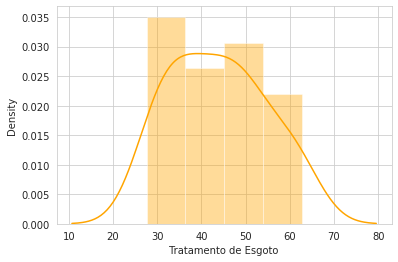

In [134]:
sns.distplot(EmissaoCarbono[' Tratamento de Esgoto '], color= 'orange');

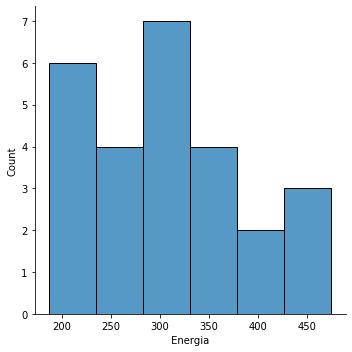

In [33]:
sns.displot(EmissaoCarbono[' Energia '])

In [57]:
Grafico1 = EmissaoCarbono[' Processos Industriais ']

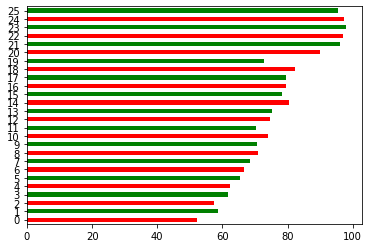

In [39]:
Grafico1.plot(kind ='barh',color=['red','green'])

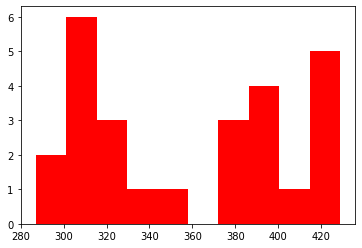

In [49]:
plt.hist(x= EmissaoCarbono[' Agricultura '], color= 'red');

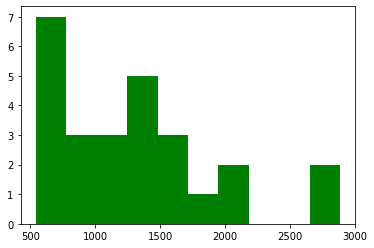

In [55]:
plt.hist(x= EmissaoCarbono[' Emissões pelo uso da terra '], color= 'green');

**Feita  a  análise dos gráficos acima,  se percebe   o  padrão observado na tabela describe,na qual a emissão de carbono é mais intensa pelo uso da terra, seguida da agricultura e energia. Sendo a mais  baixa o tratamento de esgoto.**

**Finalizando este Projeto,  será  feito uma busca por Outliers, a partir da utilização do Boxplot e  da biblioteca PyOD.**

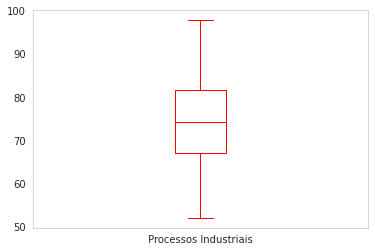

In [116]:
EmissaoCarbono.boxplot( column =[' Processos Industriais '], grid = False,color = 'red')

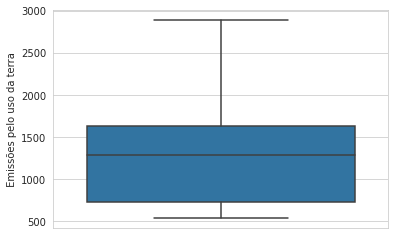

In [108]:
sns.boxplot( y = ' Emissões pelo uso da terra ', data = EmissaoCarbono)

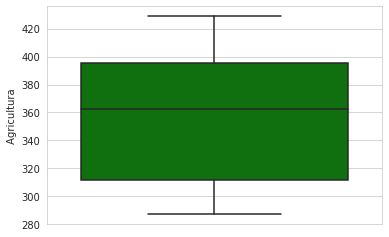

In [111]:
sns.boxplot( y = ' Agricultura ', data = EmissaoCarbono, color='green')

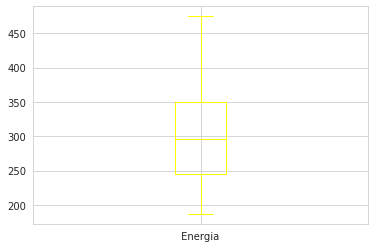

In [122]:
EmissaoCarbono.boxplot( column =[' Energia '], grid =True,color = 'yellow')

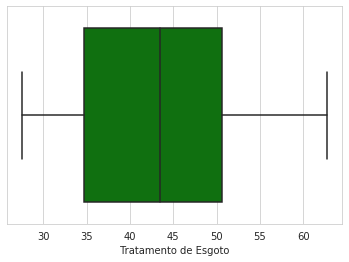

In [123]:
sns.boxplot( x = ' Tratamento de Esgoto ', data = EmissaoCarbono, color='green')

**Como  visto nos  gráficos  acima, não há outliers, porém  será feito nova avaliação usando a biblioteca PyOD  que é mais exata, embora  tenhamos  uma base de  dados  muita pequena.** 

In [192]:
detector = KNN()
detector.fit(EmissaoCarbono.iloc[:,1:6])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [193]:
previsores = detector.labels_
previsores

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

**Foram detectados 3 outliers. O número 0 representa a não presenca de outliers e o 1  a presença.**

In [194]:
np.unique( previsores,return_counts=True)

(array([0, 1]), array([23,  3]))

**Numa  base  grande de dados, se  faz importante  fazer a contagem, o que não ocorre com este dataset.Porém, foi feito a  contagem para deixar  o registro mais  fácil de ser visualizado.**

In [195]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 226.68574312,  213.94952937,  214.58153265,  212.94372789,
        213.94952937,  556.17459254,  151.24628454,  249.68212465,
        165.45020545,  165.95242025,  108.7998524 ,  102.96878621,
        217.63490038, 1002.59913911, 1200.16425761,  534.81210568,
        303.35438162,  151.24628454,  205.51659978,  165.58696044,
        105.15984392,  124.55162244,  142.04240574,  142.04240574,
        158.38949849,  101.11494072])

In [196]:
outliers =[]
for i in range(len(previsores)):
   if previsores[i]== 1:
     outliers.append(i)

In [197]:
print(outliers)

[5, 13, 14]


**Estes são os indices  que  se encontram os outliers.**

**Por  fim, a lista  com os  outliers  que deverão ser analisadas  pelo setor  responável da empresa  para confirmar ou não a importância destes achados.**

In [198]:
lista_outliers = EmissaoCarbono.iloc[outliers, :]
lista_outliers

,Ano,Energia,Processos Industriais,Agricultura,Emissões pelo uso da terra,Tratamento de Esgoto,Total de Emissões
5,1995,225.2355,65.357800,316.6718,2138.903687,33.2076,2779.376387
13,2003,289.9688,75.129122,372.8406,2688.236630,44.2838,3470.458952
14,2004,305.8621,80.340962,386.2663,2885.478430,45.2911,3703.238892


#Conclusão

Os  objetivos do Projeto foram seguidos e  o problema  resolvido, sendo feita as  visualizações gráficas  básicas orientando  a análise do dataset, incluindo a  verificação de outliers no processamento de dados. Ou seja, se faz muito importante para  uma  análise de machine  learnig  esta fase incial do projeto.